# _evosim_ Simulator mode example 2: _in vitro_ serial passaging
### This is an example of simulating a single run of _in vitro_ serial passaging. For an introduction to the Simulator mode and a more extensive description of functional capabilities see Example 1.


In [1]:
# import the Simulator module
from evosim import Simulator

# these are not necessary for evosim functionalities, but we will use them elsewhere in the 
#tutorial to visualize some of the results
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sim=Simulator()

We will simulate the serial passaging via sequential dilutions of a nearly-homogeneous bacterial population growing in medium. We will assume that there are 4 potential cell types that can arise by heritable alterations in this population: WT, mut1, mut2, mut3.

We first need to define the initial population configuration. We will assume a rough starting population of a million plated cells, a dilution at x30 down to the original population level, and a carrying capacity of 5*10^7. So we can expect about a 60% confluence at the time of passaging.

In [3]:
initial_subpopulations = {'WT':10**6,'mut1':20,'mut2':5,'mut3':0}
sim.initialize(initial_subpopulations, carrying_capacity=5*10**7, new_folder=False)

We will assume a wildtype bacterial expected division time of 30 minutes, with similar but slightly more/less favored times for the mutant types. Our time unit of choice will be hours here.

In [4]:
birth_rates={'WT':0.5,'mut1':0.47,'mut2':0.42,'mut3':0.53}
death_rates = {'WT':0.04,'mut1':0.04,'mut2':0.04,'mut3':0.04}

Next, we must specify the probability of mutations, assuming equal rates for forward and backward mutations.

In [5]:
mut=10**(-3)
mut_probs={'WT': {'mut1': mut,'mut2':mut,'mut3':mut}, 'mut1':  {'WT': mut,'mut2':mut,'mut3':mut},\
           'mut2':  {'WT': mut,'mut1':mut,'mut3':mut},'mut3':  {'WT': mut,'mut1':mut,'mut2':mut}} 

Now let's set up the simulation for 3 weeks, recording once a day.

In [6]:
dilution_threshold = 3*10**7

total_time_passed = 0
MAX_TIME = 3*7*24
remaining_time = MAX_TIME
while total_time_passed < MAX_TIME:
    #Let cells grow, keep checking if they have passed the dilution threshold
    time_passed, _ = sim.evolve(max_sim_time = remaining_time,recording_interval = 24,birth_rates = birth_rates,\
                        death_rates=death_rates,mut_probs=mut_probs,detection_threshold=dilution_threshold)
    total_time_passed += time_passed
    remaining_time = MAX_TIME - total_time_passed
    #If they past the dilution threshold, passage down to approximately 10^6; assume this takes a few minutes.
    if sim.pop_total()>=dilution_threshold:
        new_pop=np.random.normal(10**6,400)
        sim.perform_dilution(new_pop,dilution_time=0.1)

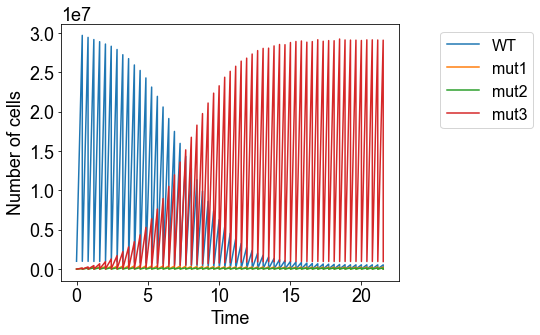

In [7]:
sim.plot_full_time_course_clonal(time_conversion='hours_to_days')

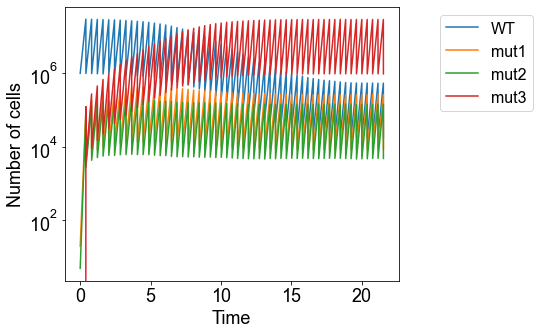

In [8]:
sim.plot_full_time_course_clonal(time_conversion='hours_to_days',scale='log')

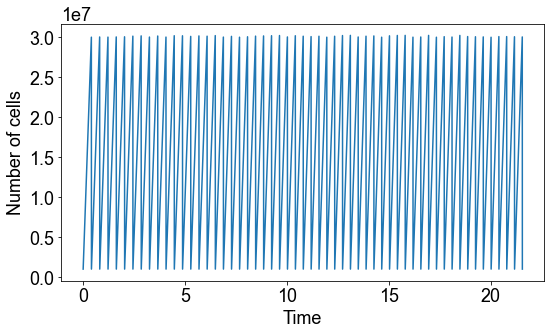

In [9]:
sim.plot_full_time_course_total(time_conversion='hours_to_days')

This will generate a table of the different cell type population levels at each time point:

Let's look at how the diversity changed over time.

In [10]:
shannon_df=sim.convert_time(sim.diversity_full_time_course(index='shannon'),'hours_to_days')
simpson_df=sim.convert_time(sim.diversity_full_time_course(index='simpson'),'hours_to_days')
gini_simpson_df=sim.convert_time(sim.diversity_full_time_course(index='gini-simpson'),'hours_to_days')
gini_df=sim.convert_time(sim.diversity_full_time_course(index='gini'),'hours_to_days')

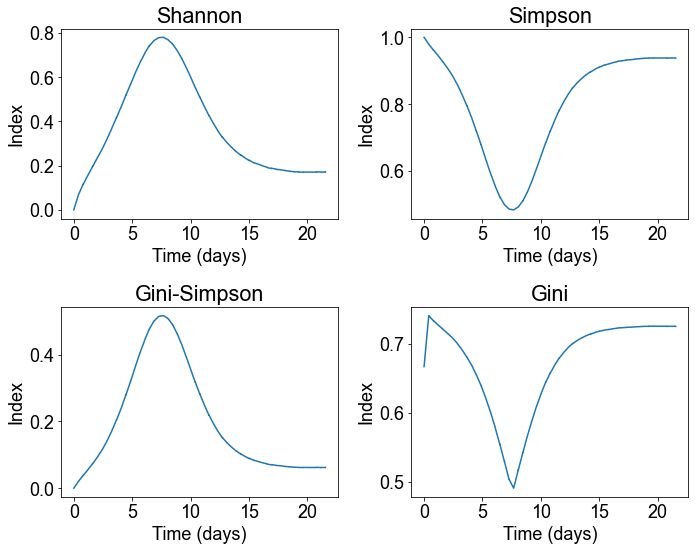

In [11]:
fig, axs = plt.subplots(2, 2,figsize=(10,8))
axs[0, 0].plot(shannon_df.index,shannon_df['shannon'])
axs[0, 0].set_title('Shannon')
axs[0, 1].plot(simpson_df.index,simpson_df['simpson'])
axs[0, 1].set_title('Simpson')
axs[1, 0].plot(gini_simpson_df.index,gini_simpson_df['gini-simpson'])
axs[1, 0].set_title('Gini-Simpson')
axs[1, 1].plot(gini_df.index,gini_df['gini'])
axs[1, 1].set_title('Gini')

for ax in axs.flat:
    ax.set(xlabel='Time (days)', ylabel='Index')
    #ax.set_yscale('log')

plt.tight_layout()
plt.show()

What if we dilute at nearly the carrying capacity?

In [ ]:
sim.initialize(initial_subpopulations, carrying_capacity=5*10**7)

dilution_threshold = 4.8*10**7

total_time_passed = 0
MAX_TIME = 3*7*24
remaining_time = MAX_TIME
while total_time_passed < MAX_TIME:
    #Let cells grow, keep checking if they have passed the dilution threshold
    time_passed, _ = sim.evolve(max_sim_time = remaining_time,recording_interval = 24,birth_rates = birth_rates,\
                        death_rates=death_rates,mut_probs=mut_probs,detection_threshold=dilution_threshold)
    total_time_passed += time_passed
    remaining_time = MAX_TIME - total_time_passed
    #If they past the dilution threshold, passage down to approximately 10^6; assume this takes a few minutes.
    if sim.pop_total()>=dilution_threshold:
        new_pop=np.random.normal(10**6,400)
        sim.perform_dilution(new_pop,dilution_time=0.1)

In [ ]:
sim.plot_full_time_course_total(time_conversion='hours_to_days')